In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split


TRAIN_DATA_PATH = 'NASA/PC4.csv'
TEST_DATA_PATH = 'NASA/PC4.csv'
TARGET_NAME = 'Defective'

train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

# x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
# x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]


data = pd.read_csv(TRAIN_DATA_PATH)
y = data.Defective
X = data.drop('Defective', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

nameOfHeaders = x_train.columns.values

In [3]:
target = data['Defective']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [4]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 16


array([0.79548292, 0.84555697, 0.88397863, 0.88253993, 0.88762298,
       0.89267957, 0.89050566, 0.89341479, 0.89342008, 0.8919708 ,
       0.89052153, 0.89267957, 0.89341479, 0.89196022, 0.89196022,
       0.90066646, 0.8934095 , 0.8955887 , 0.89557812, 0.89558341,
       0.89051624, 0.89340421, 0.89268486, 0.89124617, 0.8854332 ,
       0.89775204, 0.89413414, 0.89124617, 0.89196022, 0.89195493,
       0.88905109, 0.89050566, 0.89050037, 0.89414472, 0.89051095,
       0.89486935, 0.89339892])

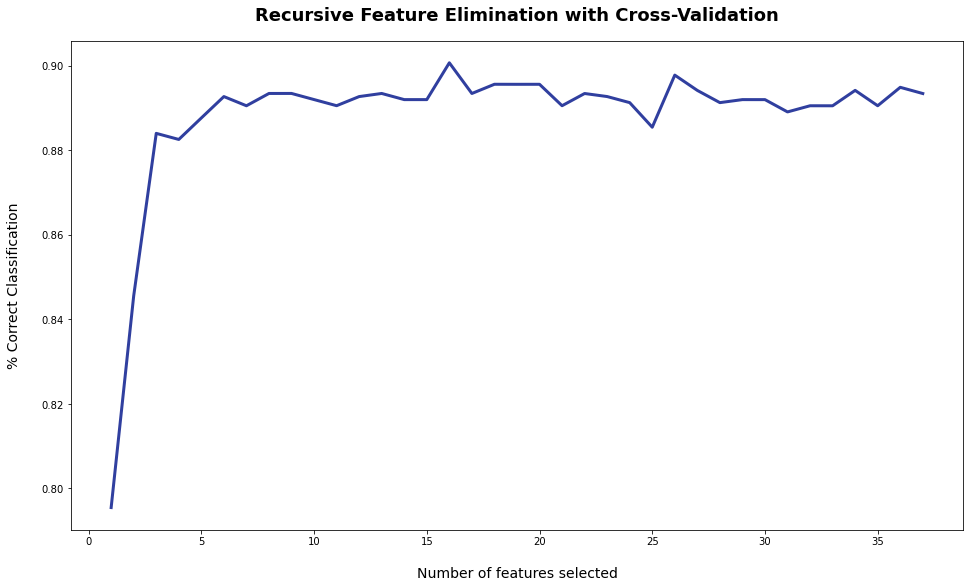

In [5]:
display(rfecv.grid_scores_)
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

[ 1  2  6  8  9 10 11 12 13 14 15 16 20 21 22 25 26 27 28 32 33]


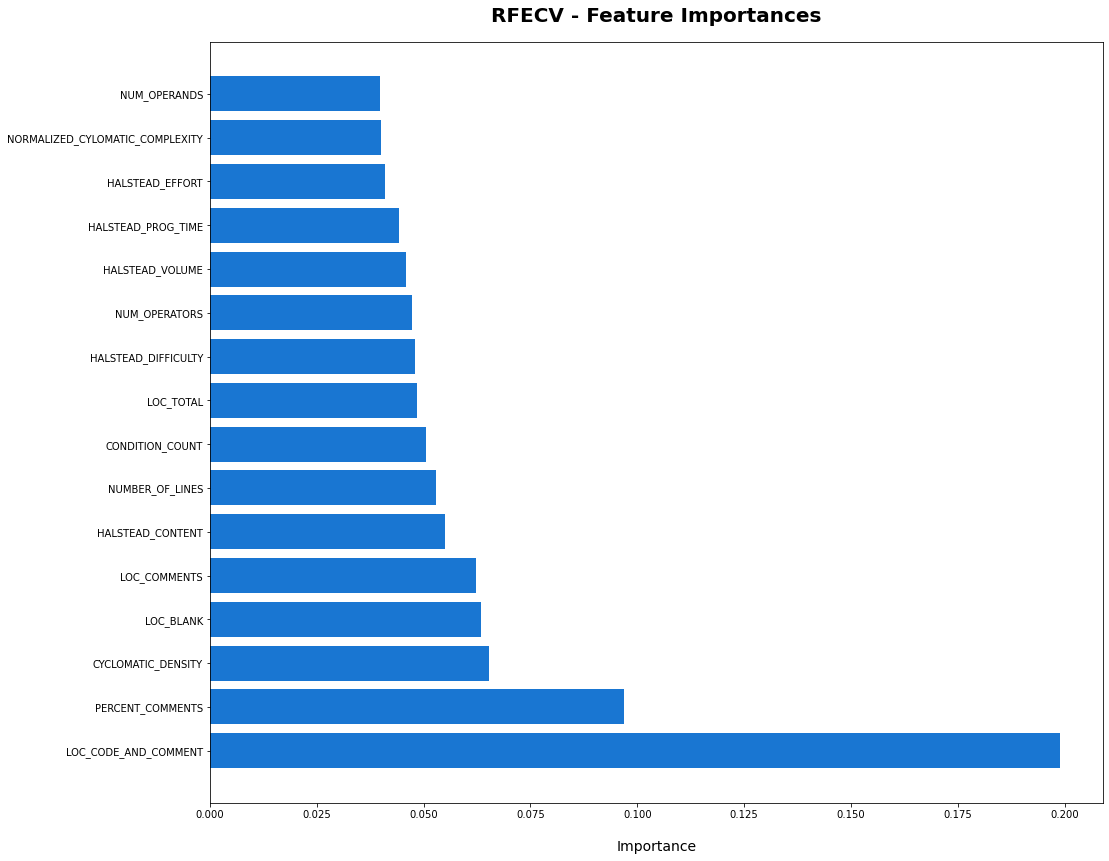

In [6]:
print(np.where(rfecv.support_ == False)[0])
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()